<a href="https://colab.research.google.com/github/Jhilam-Moumit/rlab/blob/main/student_exam_score_analysis_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://devra.ai/analyst/notebook/3169/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Student Exam Score Analysis and Predictor</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

I find it fascinating that by analyzing simple study and lifestyle metrics such as hours studied, sleep hours, and previous scores, we may be able to predict a student's exam performance. If you appreciate this analysis, please consider upvoting it.

## Table of Contents

- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictor Creation and Evaluation](#Predictor-Creation-and-Evaluation)
- [Conclusion](#Conclusion)

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Set matplotlib backend and inline plotting
import matplotlib
matplotlib.use('Agg')  # Use Agg backend to prevent GUI issues

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure plt uses a non-interactive backend
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set seaborn style for plots
sns.set(style='whitegrid')

In [2]:
# Load the dataset
# Data file description: student_exam_scores.csv contains student_id, hours_studied, sleep_hours, attendance_percent, previous_scores, exam_score
data_path = '/content/student_exam_scores (1).csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataframe
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


## Data Cleaning and Preprocessing

In this section, we check for any missing values, validate data types, and perform any needed type conversions. Note that the data does not include explicit date information, so the date type is not applicable here.

In [3]:
# Quick overview of the dataframe information
df.info()

# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Since student_id is a unique identifier, it is not needed for numerical analysis
df_clean = df.drop('student_id', axis=1)

# Basic summary statistics
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
Missing values in each column:
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


## Exploratory Data Analysis

In this section, we explore the dataset using multiple visualization techniques. We intend to identify data distributions, correlations among numeric features and potential outliers. Note that we apply various plots such as histograms, box plots, scatter plots and even a correlation heatmap (only if enough numeric columns are present).

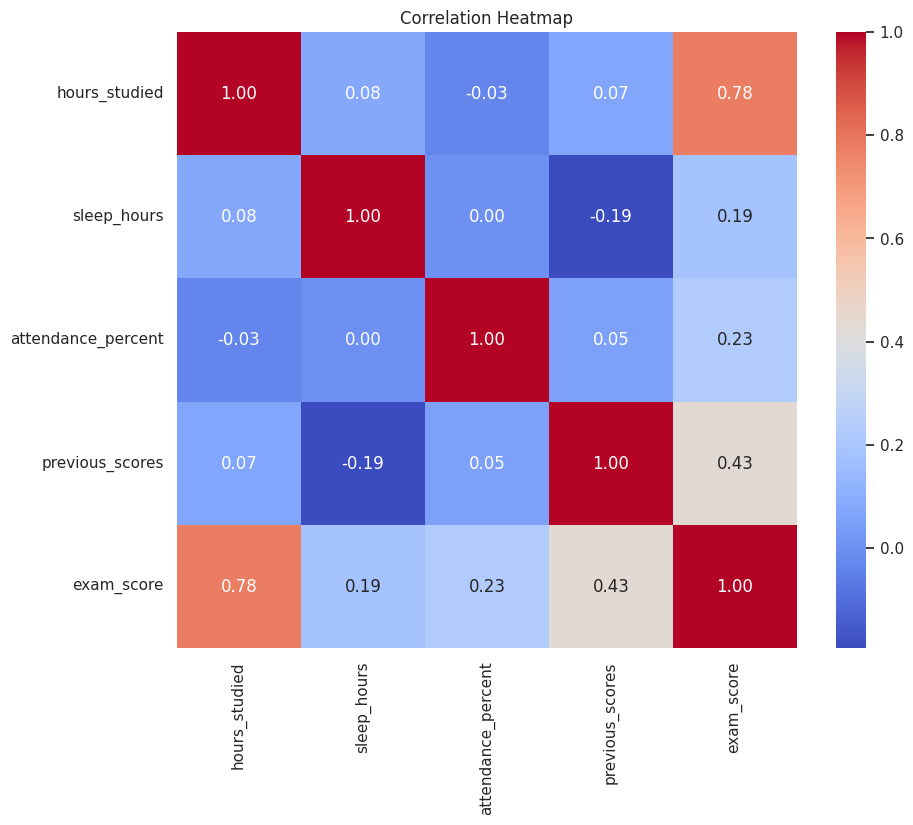

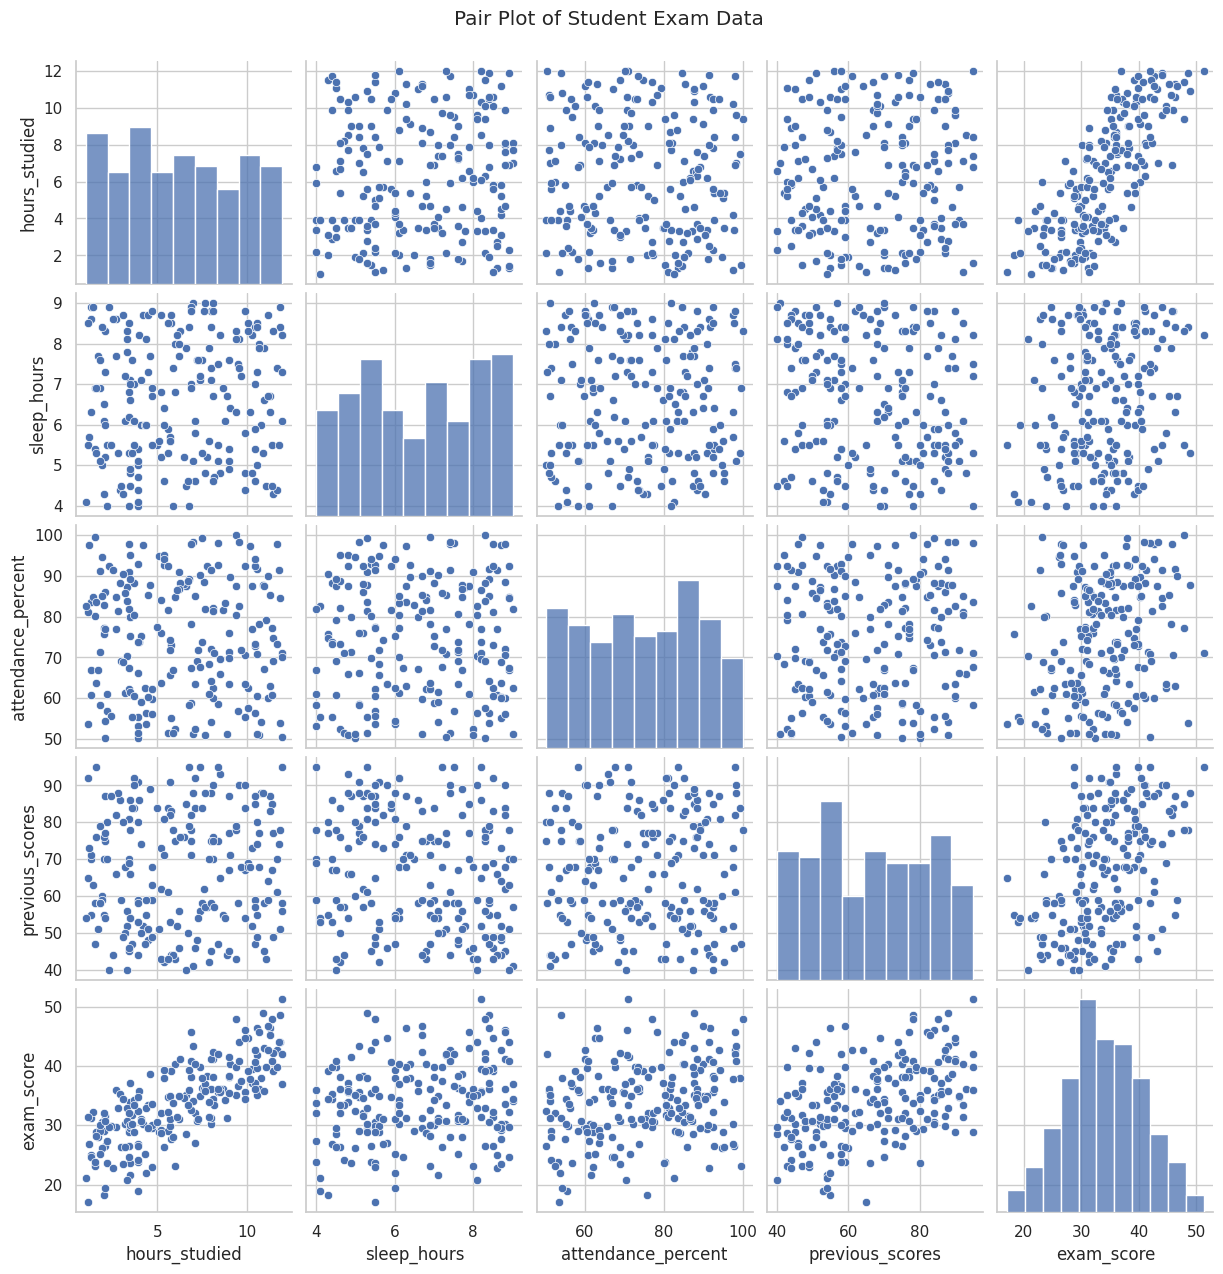

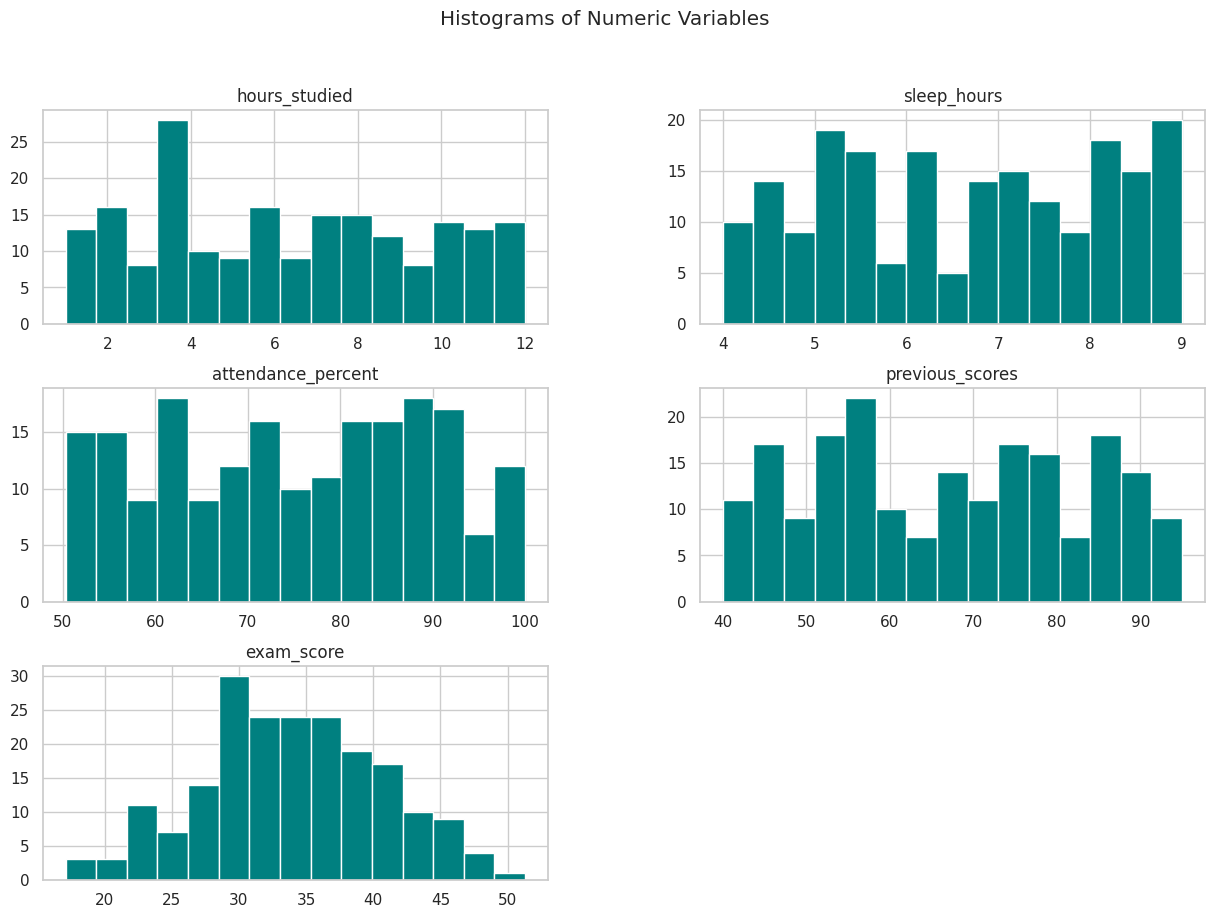

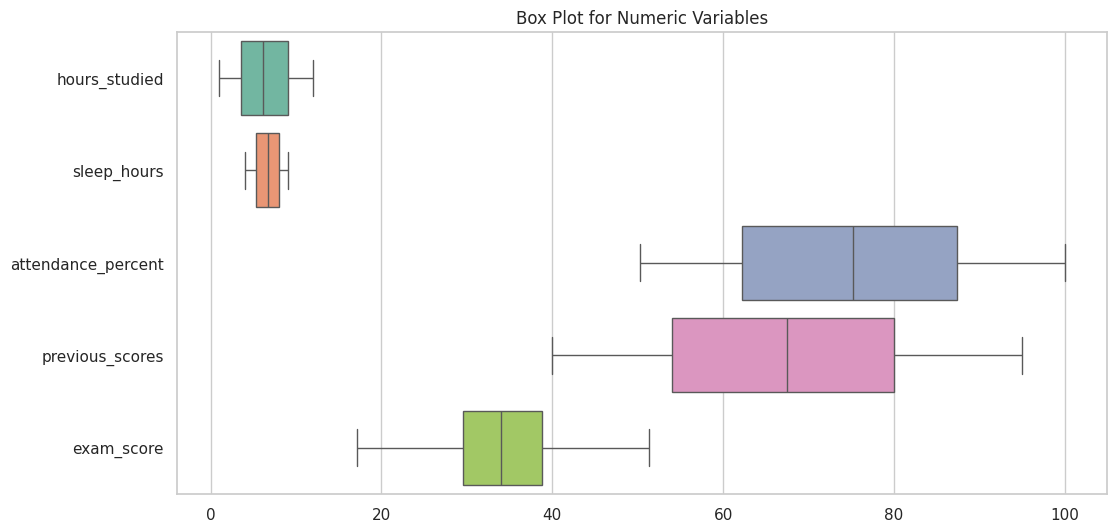

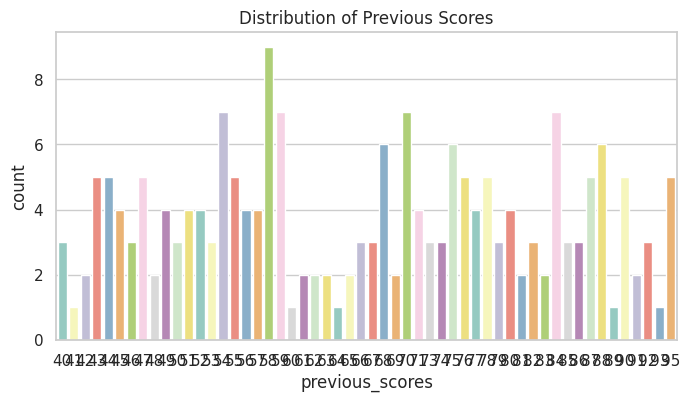

In [4]:
# Create a numeric dataframe for correlation analysis
numeric_df = df_clean.select_dtypes(include=[np.number])

# If there are four or more numeric columns, generate a heatmap of the correlations
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Pair plot for understanding relationships among variables
sns.pairplot(df_clean)
plt.suptitle('Pair Plot of Student Exam Data', y=1.02)
plt.show()

# Histograms to view distributions
numeric_df.hist(bins=15, figsize=(15, 10), color='teal')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title('Box Plot for Numeric Variables')
plt.show()

# Count plot for previous_scores (as a proxy for categorical distribution if needed)
plt.figure(figsize=(8, 4))
sns.countplot(x='previous_scores', data=df_clean, palette='Set3')
plt.title('Distribution of Previous Scores')
plt.show()

## Predictor Creation and Evaluation

We now build a simple predictive model to forecast a student's exam score based on hours studied, sleep hours, attendance percentage and previous scores. We will use a linear regression model and evaluate it using the R² score and mean squared error. The predictor can be a starting point for more intricate models in the future.

R² Score: 0.8537447137159516
Mean Squared Error: 7.761782668623075


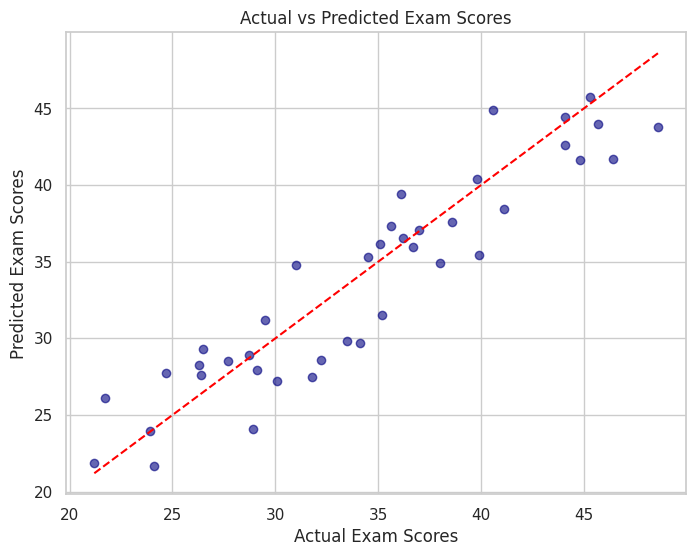

In [5]:
# Define features and target variable
X = df_clean.drop('exam_score', axis=1)
y = df_clean['exam_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R² Score:', r2)
print('Mean Squared Error:', mse)

# Plotting actual vs predicted exam scores
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='navy', alpha=0.6)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ls="--", color="red")
plt.show()

## Conclusion

This notebook provided a detailed journey starting from data cleaning to the creation of a predictive model for student exam scores. Our strategy was to first understand the variables through numerous visualizations, and then lean into creating a straightforward linear regression predictor. The model's performance, as summarized by the R² score and mean squared error, offers a baseline to build upon. Future improvements may include exploring non-linear models, adding interaction terms, or even incorporating other potentially relevant features if available.

Thank you for reading this analysis. If you found it useful, please upvote.